In [1]:
import torch

from reggae.gp.variational.models import SingleLinearLFM
from reggae.gp.variational.trainer import Trainer
from reggae.data_loaders import load_barenco_puma, DataHolder, scaled_barenco_data
from reggae.utilities import save, load
from reggae.plot.variational_plotters import Plotter

from matplotlib import pyplot as plt
import numpy as np

f64 = np.float64

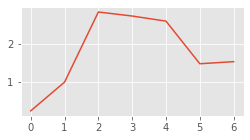

In [2]:
replicate = 0 #TODO: for now we are just considering the first replicate

m_observed, f_observed, σ2_m_pre, σ2_f_pre, t = load_barenco_puma('../data/')

m_df, m_observed = m_observed
f_df, f_observed = f_observed
# Shape of m_observed = (replicates, genes, times)
m_observed = torch.tensor(m_observed)[replicate]

σ2_m_pre = f64(σ2_m_pre)
σ2_f_pre = f64(σ2_f_pre) #not used

num_genes = m_observed.shape[0]
num_tfs = 1

t_inducing = torch.linspace(f64(0), f64(1), 5, dtype=torch.float64).reshape((-1, 1))
t_observed = torch.linspace(f64(0), f64(1), 7).view(-1)
plt.figure(figsize=(4, 2))
plt.plot(m_observed[0])

In [3]:
def plot_genes(rtol=1e-4, atol=1e-6):
    t_predict = torch.linspace(f64(0), f64(1), 80)
    initial_value = torch.zeros((num_genes, 1), dtype=torch.float64) #, dtype=torch.float64

    # output_obs, _ = model(t_observed.view(-1), initial_value, rtol=rtol, atol=atol)
    # output_obs = torch.squeeze(output_obs).detach()
    # plt.plot(t_observed, output_obs[0])
    # plt.scatter(t_observed, m_observed[0][0])

    outputs, _ = model(t_predict.view(-1), initial_value, rtol=rtol, atol=atol, num_samples=1)

    outputs = torch.squeeze(outputs)
    print(outputs.shape)
    plt.figure(figsize=(5, 8))
    for i in range(num_genes):
        plt.subplot(511+i)
        plt.plot(t_predict, torch.squeeze(outputs[i]).detach())
        plt.scatter(t_observed, m_observed[i])

In [20]:
model = SingleLinearLFM(num_genes, num_tfs, t_inducing, t_observed, extra_points=2, known_variance=σ2_m_pre[0])
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = Trainer(model, optimizer, (t_observed, m_observed))

# list(model.parameters())

C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = torch.tensor(t_inducing, requires_grad=False)


### Outputs prior to training:

C:\Users\Jacob\Documents\proj\reggae\reggae\plot\variational_plotters.py:74: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


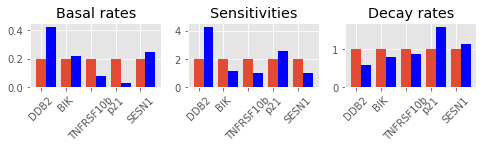

In [21]:
plotter = Plotter(model, m_df.index, t_inducing)
plotter.plot_kinetics()

torch.Size([5, 80])


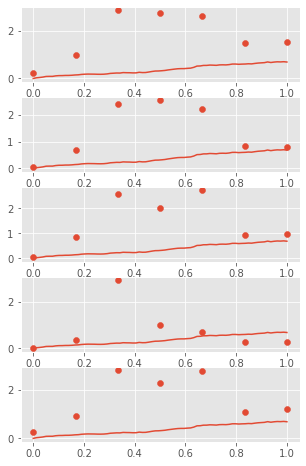

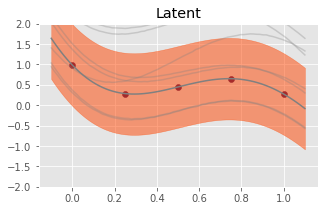

In [22]:
plot_genes(rtol=1e-3, atol=1e-4)
plotter.plot_tfs()

Epoch 1/65 - Loss: 2292.80 (2292.80 0.00) b: 0.40 d 0.80 s: 2.20 λ: 1.103
Epoch 2/65 - Loss: 1975.37 (1512.15 463.22) b: 0.59 d 0.60 s: 2.40 λ: 0.913
Epoch 3/65 - Loss: 1911.91 (1489.66 422.25) b: 0.74 d 0.53 s: 2.55 λ: 0.816
Epoch 4/65 - Loss: 1511.90 (1294.17 217.73) b: 0.84 d 0.56 s: 2.63 λ: 0.722
Epoch 5/65 - Loss: 1780.57 (1373.35 407.21) b: 0.89 d 0.67 s: 2.63 λ: 0.633
Epoch 6/65 - Loss: 998.07 (811.82 186.24) b: 0.92 d 0.78 s: 2.63 λ: 0.552
Epoch 7/65 - Loss: 801.78 (782.26 19.52) b: 0.94 d 0.89 s: 2.64 λ: 0.486
Epoch 8/65 - Loss: 798.86 (765.63 33.22) b: 0.96 d 1.00 s: 2.66 λ: 0.430
Epoch 9/65 - Loss: 758.52 (686.28 72.24) b: 0.99 d 1.10 s: 2.70 λ: 0.380
Epoch 10/65 - Loss: 540.22 (463.38 76.84) b: 1.01 d 1.19 s: 2.74 λ: 0.335
Epoch 11/65 - Loss: 571.36 (510.44 60.93) b: 1.03 d 1.26 s: 2.80 λ: 0.294
Epoch 12/65 - Loss: 396.60 (358.45 38.15) b: 1.06 d 1.32 s: 2.86 λ: 0.260
Epoch 13/65 - Loss: 339.26 (315.81 23.46) b: 1.09 d 1.35 s: 2.94 λ: 0.231
Epoch 14/65 - Loss: 274.14 (258.8

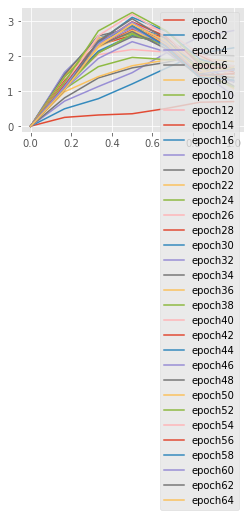

In [23]:
tol = 5e-3
# trainer = Trainer(optimizer)
output = trainer.train(65, rtol=tol, atol=tol/10, report_interval=1, plot_interval=2)

### Outputs after training

torch.Size([5, 80])


C:\Users\Jacob\Documents\proj\reggae\reggae\plot\variational_plotters.py:74: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


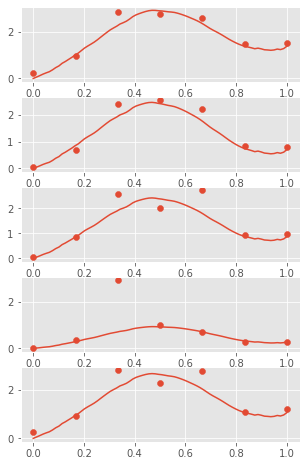

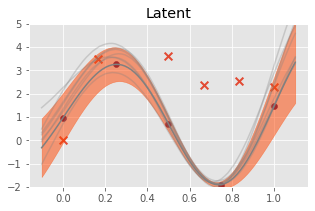

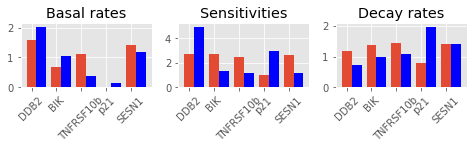

In [25]:
tol = 1e-3
plotter = Plotter(model, m_df.index, t_inducing)

# plot_losses(trainer)
plot_genes(rtol=tol, atol=tol/10)
plotter.plot_tfs(ylim=(-2, 5), plot_barenco=True)
plotter.plot_kinetics()

In [29]:
save(model, 'variational_linear')

In [260]:
model = load(SingleLinearLFM, num_genes, num_tfs, t_inducing)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = Trainer(optimizer)

C:\Users\Jacob\miniconda3\envs\wishart\lib\site-packages\ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


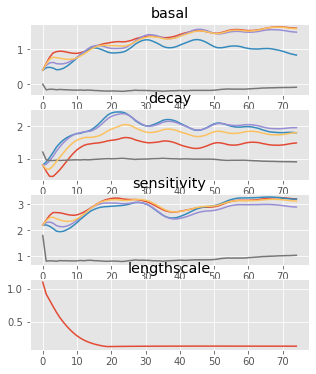

In [19]:
titles = ['basal', 'decay', 'sensitivity', 'lengthscale']
datas = [np.array(trainer.basalrates)[:,:,0],
         np.array(trainer.decayrates)[:,:,0],
         np.array(trainer.sensitivities)[:,:,0],
         np.array(trainer.lengthscales)]

plt.figure(figsize=(5, 6))
for i, (title, data) in enumerate(zip(titles, datas)):
    plt.subplot(411 + i)
    plt.title(title)
    # if data.ndim > 1:
    #     for j in range(data.shape[1]):

    plt.plot(data)





